# ML4NLP1
## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is o make you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- Numpy: [Documentation](https://numpy.org/doc/)

**Importing files to Google Colab:** If you have never used Colab or never uploaded a file to Colab, quickly skim over an introduction: [Introduction on medium](https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97).

We're using the second method mentioned in the blogpost: (1) upload the four files `x_train.txt` and `y_train.txt`, `x_test.txt` and `y_test.txt` to a directory in Google Drive and (2) adjust the paths in the second cell to point to your uploaded files.

Then execute the first cell to give Colab permission to access the two files.

In [ ]:
import pandas as pd
import numpy as np
import csv
import re
import string
from collections import defaultdict

In [ ]:
# download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:00<00:00, 106MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 58.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 78.9MB/s]


In [ ]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [ ]:
# combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})

In [ ]:
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [ ]:
# get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'

In [ ]:
# T: Have a quick peek at the training data, looking at a couple of texts from different languages. Do you notice anything that might be challenging for the classification?

# Ans: For exampl the language like 'mai' and 'tha', they are not alphabet based and it's hard to be present to the model. Also there are some language both based on alphabet and even some highly similar words.

In [ ]:
# T: How many instances per label are there in the training and test set? Do you think this is a balanced dataset? Do you think the train/test split is appropriate? If not, please rearrange the data in a more appropriate way.
value_counts = train_df['label'].value_counts()
value_counts_test = test_df['label'].value_counts()
# 打印结果
print(value_counts)
print(value_counts_test)
# Ans: I think it's a balanced dataset per class. But the size of training set is equal to test set, this split is not right since testset is usually smaller than training set.

import pandas as pd
from sklearn.model_selection import train_test_split

test_df_to_train, test_df_remaining = train_test_split(test_df, test_size=0.5, random_state=42, stratify=test_df['label']) #fixed the split

# 将抽取出来的数据添加到 train_df 中
train_df = pd.concat([train_df, test_df_to_train], ignore_index=True)

# 更新 test_df
test_df = test_df_remaining

est    500
eng    500
vep    500
sgs    500
uig    500
      ... 
lmo    500
mya    500
ilo    500
csb    500
ltz    500
Name: label, Length: 235, dtype: int64
mwl    500
uig    500
tat    500
nno    500
new    500
      ... 
frp    500
krc    500
mlg    500
msa    500
ckb    500
Name: label, Length: 235, dtype: int64


In [ ]:
# T: Get a subset of the train/test data that includes English, German, Dutch, Danish, Swedish and Norwegian, plus 20 additional languages of your choice (the labels can be found in the file labels.csv)
# Ans:
fixed_languages = ['eng', 'deu', 'nld', 'dan', 'swe', 'nob']
self_selected_languages = ['est', 'tha', 'guj', 'tam', 'vie', 'lat', 'urd', 'por', 'fra', 'rus', 'ara', 'heb', 'hin', 'jpn', 'kor', 'zho', 'spa', 'ita', 'tur', 'ell']
final_language_list = fixed_languages + self_selected_languages
sub_traindf = train_df[train_df['label'].isin(final_language_list)]
sub_testdf = test_df[test_df['label'].isin(final_language_list)]

In [ ]:
# T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder
le_fitted = LabelEncoder().fit(sub_traindf['label'])
y_train_dev, y_test = le_fitted.transform(sub_traindf['label']), le_fitted.transform(sub_testdf['label'])




In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Pipeline structure
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])


In [ ]:
model = pipeline.fit(sub_traindf['text'],y_train_dev)


In [ ]:

from sklearn.metrics import classification_report
y_pred = model.predict(sub_testdf['text'])

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       250
           1       0.98      0.96      0.97       250
           2       0.96      0.96      0.96       250
           3       1.00      0.98      0.99       250
           4       0.81      0.98      0.89       250
           5       0.99      0.96      0.97       250
           6       0.94      0.99      0.96       250
           7       1.00      0.97      0.99       250
           8       1.00      0.98      0.99       250
           9       1.00      0.97      0.99       250
          10       0.98      0.98      0.98       250
          11       0.90      0.65      0.76       250
          12       1.00      0.98      0.99       250
          13       1.00      0.94      0.97       250
          14       1.00      0.98      0.99       250
          15       0.99      0.97      0.98       250
          16       0.98      0.98      0.98       250
          17       1.00    

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 3)],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['saga', 'liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid,cv=3, scoring='accuracy', verbose=3,refit=True)

# Fit model
grid_search.fit(sub_traindf['text'], y_train_dev)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END classifier__penalty=l1, classifier__solver=saga, vectorizer__ngram_range=(1, 1);, score=0.917 total time=  43.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END classifier__penalty=l1, classifier__solver=saga, vectorizer__ngram_range=(1, 1);, score=0.910 total time=  44.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END classifier__penalty=l1, classifier__solver=saga, vectorizer__ngram_range=(1, 1);, score=0.920 total time=  43.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END classifier__penalty=l1, classifier__solver=saga, vectorizer__ngram_range=(1, 3);, score=0.909 total time= 3.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END classifier__penalty=l1, classifier__solver=saga, vectorizer__ngram_range=(1, 3);, score=0.906 total time= 3.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END classifier__penalty=l1, classifier__solver=saga, vectorizer__ngram_range=(1, 3);, score=0.915 total time= 3.0min
[CV 1/3] END classifier__penalty=l1, classifier__solver=liblinear, vectorizer__ngram_range=(1, 1);, score=0.916 total time=  11.8s
[CV 2/3] END classifier__penalty=l1, classifier__solver=liblinear, vectorizer__ngram_range=(1, 1);, score=0.911 total time=  12.0s
[CV 3/3] END classifier__penalty=l1, classifier__solver=liblinear, vectorizer__ngram_range=(1, 1);, score=0.924 total time=  12.0s
[CV 1/3] END classifier__penalty=l1, classifier__solver=liblinear, vectorizer__ngram_range=(1, 3);, score=0.912 total time= 1.7min
[CV 2/3] END classifier__penalty=l1, classifier__solver=liblinear, vectorizer__ngram_range=(1, 3);, score=0.909 total time= 1.7min
[CV 3/3] END classifier__penalty=l1, classifier__solver=liblinear, vectorizer__ngram_range=(1, 3);, score=0.917 total time= 1.7min
[CV 1/3] END classifier__penalty=l2, classifier__solver=saga, vectorizer__ngram_range=(1

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['saga', 'liblinear'],
                         'vectorizer__ngram_range': [(1, 1), (1, 3)]},
             scoring='accuracy', verbose=3)

In [ ]:

from sklearn.metrics import classification_report
y_pred = grid_search.best_estimator_.predict(sub_testdf['text'])

print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       250
           1       0.98      0.96      0.97       250
           2       0.96      0.96      0.96       250
           3       1.00      0.98      0.99       250
           4       0.79      0.98      0.88       250
           5       0.99      0.96      0.98       250
           6       0.94      0.99      0.96       250
           7       1.00      0.97      0.99       250
           8       1.00      0.98      0.99       250
           9       1.00      0.97      0.99       250
          10       0.98      0.98      0.98       250
          11       0.90      0.65      0.76       250
          12       1.00      0.98      0.99       250
          13       1.00      0.93      0.96       250
          14       1.00      0.98      0.99       250
          15       0.99      0.97      0.98       250
          16       0.98      0.97      0.98       250
          17       1.00    

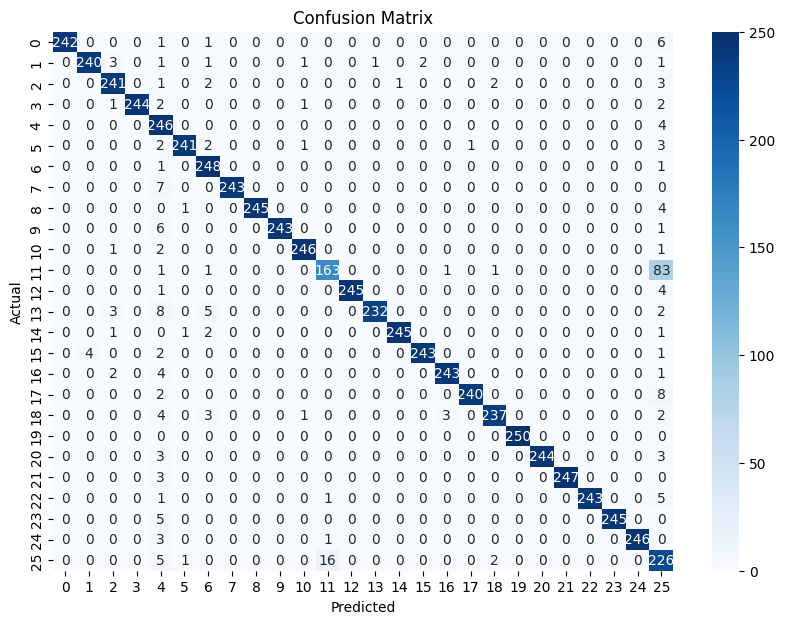

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = grid_search.best_estimator_.predict(sub_testdf['text'])


cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 0 and 18 are the best
print(final_language_list[0],final_language_list[18])


eng hin


In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'vectorizer__ngram_range': (1, 1)}


In [ ]:
!pip install eli5

In [ ]:
import eli5

# english
best_pipeline = grid_search.best_estimator_


sample_index = 0  # or any index of your choice
sample_text = sub_traindf[sub_traindf['label'] == 'eng'].iloc[sample_index]['text']
feature_names = best_pipeline.named_steps['vectorizer'].get_feature_names_out()

# eli5
eli5.show_prediction(best_pipeline.named_steps['classifier'],
                     sample_text,
                     vec=best_pipeline.named_steps['vectorizer'],
                     feature_names=feature_names,
                     top=10,  
                     target_names=best_pipeline.named_steps['classifier'].classes_)  


In [ ]:
import eli5

# sweden
best_pipeline = grid_search.best_estimator_


sample_index = 0  # or any index of your choice
sample_text = sub_traindf[sub_traindf['label'] == 'swe'].iloc[sample_index]['text']
feature_names = best_pipeline.named_steps['vectorizer'].get_feature_names_out()

# eli5
eli5.show_prediction(best_pipeline.named_steps['classifier'],
                     sample_text,
                     vec=best_pipeline.named_steps['vectorizer'],
                     feature_names=feature_names,
                     top=10,  
                     target_names=best_pipeline.named_steps['classifier'].classes_) 


In [ ]:
import eli5

# Norwegian
best_pipeline = grid_search.best_estimator_


sample_index = 0  # or any index of your choice
sample_text = sub_traindf[sub_traindf['label'] == 'nob'].iloc[sample_index]['text']
feature_names = best_pipeline.named_steps['vectorizer'].get_feature_names_out()

# eli5
eli5.show_prediction(best_pipeline.named_steps['classifier'],
                     sample_text,
                     vec=best_pipeline.named_steps['vectorizer'],
                     feature_names=feature_names,
                     top=10, 
                     target_names=best_pipeline.named_steps['classifier'].classes_)  

In [ ]:
import eli5

# Norwegian
best_pipeline = grid_search.best_estimator_


sample_index = 0  # or any index of your choice
sample_text = sub_traindf[sub_traindf['label'] == 'jpn'].iloc[sample_index]['text']
feature_names = best_pipeline.named_steps['vectorizer'].get_feature_names_out()

# eli5
eli5.show_prediction(best_pipeline.named_steps['classifier'],
                     sample_text,
                     vec=best_pipeline.named_steps['vectorizer'],
                     feature_names=feature_names,
                     top=10, 
                     target_names=best_pipeline.named_steps['classifier'].classes_)  

In [ ]:
#1. All characters
best_selected_languages = ['eng', 'hin']
sub_traindf = train_df[train_df['label'].isin(best_selected_languages)]
sub_testdf = test_df[test_df['label'].isin(best_selected_languages)]
# T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder
le_fitted = LabelEncoder().fit(sub_traindf['label'])
y_train_dev, y_test = le_fitted.transform(sub_traindf['label']), le_fitted.transform(sub_testdf['label'])
best_model = grid_search.best_estimator_
best_model.fit(sub_traindf['text'],y_train_dev)
y_pred = best_model.predict(sub_testdf['text'])
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       1.00      0.98      0.99       250

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



In [ ]:
#1. 500 characters
best_selected_languages = ['eng', 'hin']
sub_traindf = train_df[train_df['label'].isin(best_selected_languages)]
sub_testdf = test_df[test_df['label'].isin(best_selected_languages)]
# T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder
le_fitted = LabelEncoder().fit(sub_traindf['label'])
y_train_dev, y_test = le_fitted.transform(sub_traindf['label']), le_fitted.transform(sub_testdf['label'])
best_model = grid_search.best_estimator_
sub_traindf['text'] = sub_traindf['text'].apply(lambda x: x[:500])
best_model.fit(sub_traindf['text'],y_train_dev)

sub_testdf['text'] = sub_testdf['text']
y_pred = best_model.predict(sub_testdf['text'])
print(classification_report(y_test , y_pred))

<ipython-input-41-c371481e247d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_traindf['text'] = sub_traindf['text'].apply(lambda x: x[:500])


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       1.00      0.98      0.99       250

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



<ipython-input-41-c371481e247d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_testdf['text'] = sub_testdf['text']


In [ ]:
#1. 100 characters
best_selected_languages = ['eng', 'hin']
sub_traindf = train_df[train_df['label'].isin(best_selected_languages)]
sub_testdf = test_df[test_df['label'].isin(best_selected_languages)]
# T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder
le_fitted = LabelEncoder().fit(sub_traindf['label'])
y_train_dev, y_test = le_fitted.transform(sub_traindf['label']), le_fitted.transform(sub_testdf['label'])
best_model = grid_search.best_estimator_
sub_traindf['text'] = sub_traindf['text'].apply(lambda x: x[:100])
best_model.fit(sub_traindf['text'],y_train_dev)

sub_testdf['text'] = sub_testdf['text']
y_pred = best_model.predict(sub_testdf['text'])
print(classification_report(y_test , y_pred))

<ipython-input-46-fb4a7f0c10e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_traindf['text'] = sub_traindf['text'].apply(lambda x: x[:100])


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       1.00      0.98      0.99       250

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



<ipython-input-46-fb4a7f0c10e7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_testdf['text'] = sub_testdf['text']
